In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import pandas as pd

In [5]:
import sqlite3

cxn = sqlite3.connect('f:\dev\dataplayground\zillow.db')
c = cxn.cursor()

In [60]:
import_sql = "select * from listings"
c.execute(import_sql)
all_data = np.array(c.fetchall(), dtype='ui16, s64, ui16, ui16, ui16, ui16, s64, ui16, s4, ')

In [62]:
all_data[0]

array(['2', '1200 Matamoros St', '179900', '3', '2', '1627', 'Mission',
       '78572', 'TX', '26.2083479671799', '-98.3146725324614'],
      dtype='<U38')

In [68]:
dfplusplus = pd.DataFrame(all_data)

In [227]:
df_xy = pd.DataFrame(all_data)
df_xy.columns = ['listID', 'address', 'price', 'bedrooms', 'bathrooms', 'square_feet', 'city', 'zipcode', 'state', 'lat', 'lon']
df_xy = df_xy.astype({'price': 'float64', 'bedrooms': 'uint8', 'bathrooms': 'uint8', 'square_feet': 'uint32', 'lat': 'float64', 'lon': 'float64'})
df_xy

,listID,address,price,bedrooms,bathrooms,square_feet,city,zipcode,state,lat,lon
0,2,1200 Matamoros St,179900.0,3,2,1627,Mission,78572,TX,26.208348,-98.314673
1,3,3303 Santa Erica St,249000.0,4,4,3066,Mission,78572,TX,26.170369,-98.303401
2,4,1406 Colosios,305000.0,4,5,3324,Mission,78572,TX,26.189323,-98.310773
3,5,1001 Burney St,130000.0,3,2,1806,Mission,78572,TX,26.218622,-98.337284
4,6,1206 Flamingo Ave,170000.0,4,3,2808,Mission,78572,TX,26.212690,-98.287002
5,7,1807 Tierra Dorada Blvd,135500.0,3,2,1318,Mission,78572,TX,26.210409,-98.347892
6,8,2013 Peace Ave,119900.0,4,2,1745,Mission,78572,TX,26.226704,-98.328535
7,9,1201 Lucksinger Rd,189000.0,3,4,2268,Mission,78572,TX,26.214209,-98.296406
8,10,2213 Hackberry,279850.0,4,3,3292,Mission,78572,TX,26.221374,-98.281256
9,11,2402 San Alejandro,479000.0,6,7,5484,Mission,78572,TX,26.176015,-98.304481


249005

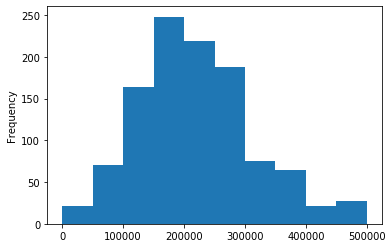

In [11]:
filtered['price'].plot(kind='hist')
plt.show()

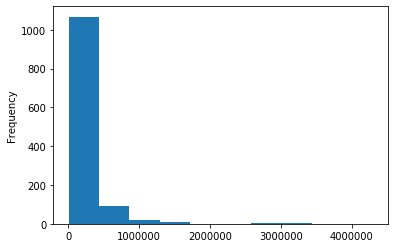

In [12]:
dfplus['price'].plot(kind='hist')
plt.show()

In [13]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor, SpatialDataFrame

In [228]:
sedf = GeoAccessor.from_xy(df_xy, 'lon', 'lat')
sedf['lat']

0       26.208348
1       26.170369
2       26.189323
3       26.218622
4       26.212690
          ...    
1187    26.451996
1188    26.451996
1189    26.451996
1190    26.451996
1191    26.451996
Name: lat, Length: 1192, dtype: float64

In [167]:
dfint

,id,address,price,bedrooms,bathrooms,square_feet,city,zipcode,state,lat,lon,SHAPE
0,2,"1200 Matamoros St Mission, TX 78572 Mission, T...",179900,3,2,1627,Mission,78572,TX,26.2083479671799,-98.3146725324614,"{""x"": -98.31489212499997, ""y"": 26.208444965000..."
1,3,"3303 Santa Erica St Mission, TX 78572 Mission,...",249000,4,4,3066,Mission,78572,TX,26.1703693557091,-98.3034011975389,"{""x"": -98.30307634399998, ""y"": 26.172522010000..."
2,4,"1406 Colosios Mission, TX 78572 Mission, TX 78...",305000,4,5,3324,Mission,78572,TX,26.1893232094464,-98.3107733818673,"{""x"": -98.31053067499994, ""y"": 26.189263854000..."
3,5,"1001 Burney St Mission, TX 78572 Mission, TX 7...",130000,3,2,1806,Mission,78572,TX,26.2186216470884,-98.3372837992595,"{""x"": -98.33711790299998, ""y"": 26.218410275000..."
4,6,"1206 Flamingo Ave Mission, TX 78572 Mission, T...",170000,4,3,2808,Mission,78572,TX,26.2126903861037,-98.2870018838708,"{""x"": -98.28683017399999, ""y"": 26.213496736000..."
5,7,"1807 Tierra Dorada Blvd Mission, TX 78572 Miss...",135500,3,2,1318,Mission,78572,TX,26.2104090321158,-98.3478923991713,"{""x"": -98.34787515499994, ""y"": 26.210575667000..."
6,8,"2013 Peace Ave Mission, TX 78572 Mission, TX 7...",119900,4,2,1745,Mission,78572,TX,26.2267039167181,-98.3285350843114,"{""x"": -98.32830876599996, ""y"": 26.227702519000..."
7,9,"1201 Lucksinger Rd Mission, TX 78572 Mission, ...",189000,3,4,2268,Mission,78572,TX,26.2142090793695,-98.2964060535503,"{""x"": -98.29609801199996, ""y"": 26.214166383000..."
8,10,"2213 Hackberry Mission, TX 78572 Mission, TX 7...",279850,4,3,3292,Mission,78572,TX,26.2213741025957,-98.2812557232766,"{""x"": -98.28116164299996, ""y"": 26.221582938000..."
9,11,"2402 San Alejandro Mission, TX 78572 Mission, ...",479000,6,7,5484,Mission,78572,TX,26.1760146840621,-98.3044812806162,"{""x"": -98.30501434699994, ""y"": 26.176479047000..."


In [165]:
gis = GIS("https://www.arcgis.com",keys.arcgislogin['username'], keys.arcgislogin['password'])
item = gis.content.get("a7b8c5cce8d0427183f0ceee19d727a3")

In [201]:
map1 = gis.map("McAllen, TX")

In [202]:
map1

MapView(layout=Layout(height='400px', width='100%'))

In [240]:
map2 = gis.map("McAllen, TX")
map2

MapView(layout=Layout(height='400px', width='100%'))

In [203]:
map1.basemap = 'gray'
sedf.spatial.plot(map_widget=map1, renderer_type='h')

True

In [241]:
map2.basemap = 'gray'
dfint.spatial.plot(map_widget=map2, renderer_type='h')

True

In [168]:
dfint.spatial.plot(map_widget=map1)

True

In [236]:
price_map = gis.map("McAllen, TX")

In [237]:
price_map.basemap = 'gray'
price_map

MapView(layout=Layout(height='400px', width='100%'))

In [238]:
sedf.spatial.plot(map_widget = price_map,
                  renderer_type='c',
                 method='esriClassifyQuantile', 
                 class_count = 10,
                col='price',
                cmap='summer',
                alpha=0.5,
                outline_color=[50,0,0,50], line_width = 1)

True

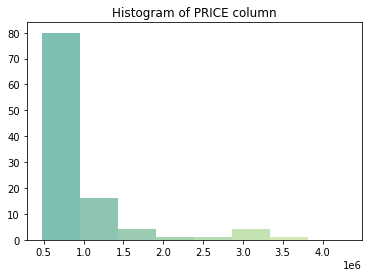

In [239]:
price_class_breaks = price_map.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
cbs_list = []
cmap_list = []
for cb in price_class_breaks:
#     print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])
    
# build a histogram for the same class breaks
n, bins, patches = plt.hist(sedf['price'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of PRICE column')
plt.ticklabel_format(style="sci", axis="x", scilimits=(0,0))

In [107]:
sedf.dtypes

id               object
address          object
price            object
bedrooms         object
bathrooms        object
square_feet      object
city             object
zipcode          object
state            object
lat              object
lon              object
SHAPE          geometry
dtype: object

In [126]:
sedf = sedf.astype({'price': 'uint16', 'bedrooms': 'uint32', 'bathrooms': 'uint32', 'square_feet': 'uint32'})

In [127]:
sedf.dtypes

id               object
address          object
price            uint16
bedrooms         uint32
bathrooms        uint32
square_feet      uint32
city             object
zipcode          object
state            object
lat              object
lon              object
SHAPE          geometry
dtype: object

In [146]:
sedf.head(3)

,id,address,price,bedrooms,bathrooms,square_feet,city,zipcode,state,lat,lon,SHAPE
0,2,"1200 Matamoros St Mission, TX 78572",48828,3,2,1627,Mission,78572,TX,26.2083479671799,-98.3146725324614,"{""x"": -98.31489212499997, ""y"": 26.208444965000..."
1,3,"3303 Santa Erica St Mission, TX 78572",52392,4,4,3066,Mission,78572,TX,26.1703693557091,-98.3034011975389,"{""x"": -98.30307634399998, ""y"": 26.172522010000..."
2,4,"1406 Colosios Mission, TX 78572",42856,4,5,3324,Mission,78572,TX,26.1893232094464,-98.3107733818673,"{""x"": -98.31053067499994, ""y"": 26.189263854000..."


In [243]:
dfint.to_csv('arcgis_geocode.csv')

In [244]:
sedf.to_csv('tamu_geocode.csv')